In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

### Маятник – тело с массой 0.4 кг, моментом инерции относительно оси 0.06 кг∙м2, центр его тяжести находится на расстоянии a м от оси, трения нет;

Это значит, что I = M*L^2 -> L = sqrt(I / M) = 0.38м

In [2]:
In = 0.06
M = 0.4
dT = 0.1
g = 9.81
L = 0.38
TotalTime = 50
Tin = np.linspace(0, TotalTime, TotalTime/dT + 1)
Tin

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [3]:
sys_tf = signal.TransferFunction([1], [In, 0, -L * M * g])
print(sys_tf)

TransferFunctionContinuous(
array([16.66666667]),
array([  1.   ,   0.   , -24.852]),
dt: None
)


### Представьте систему с помощью уравнения состояния. Проинтерпретируйте переменные состояния.

In [4]:
sys_tf = signal.tf2ss([1], [In, 0, -L * M * g])
print(sys_tf)

(array([[-0.   , 24.852],
       [ 1.   ,  0.   ]]), array([[1.],
       [0.]]), array([[ 0.        , 16.66666667]]), array([[0.]]))


#### d(z1) / d(t) = 24.8z2 + M and d(z2) / d(t) = z1 and theta = 16.(6)z2

### Промоделируйте свободное (т.е. без включения двигателя) движение маятника из малого ненулевого угла. Упадёт ли при этом маятник?

In [5]:
def plotting (sys, xlim, Xo):
    axes = plt.gca()
    axes.set_ylim([-1, 2])
    axes.set_xlim([0, xlim])
    zero_input = np.zeros(Tin.shape)    
    Tout,yout,xout = signal.lsim(sys, zero_input, Tin, X0=Xo)
    axes = plt.plot(Tout, yout, 'b')
    limit = 15 / 180.0 * np.pi
    axes = plt.plot([0, TotalTime], [limit, limit], 'r')
    axes = plt.plot([0, TotalTime], [-limit, -limit], 'r')
    plt.show()

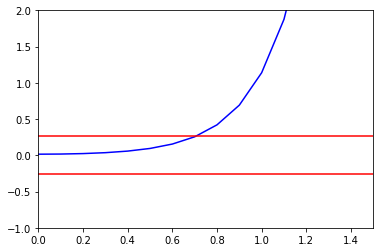

In [6]:
start_pos = 1 / 180.0 * np.pi
plotting(sys_tf, 1.5, [0, start_pos / 56 * 3])

### Добавьте в систему PID-регулятор. Проинтерпретируйте изменения в уравнении состояния.

In [7]:
def PID (P, I, D):
    PID_num = [D, P, I]
    PID_den = [1, 0]
    interm_num = np.convolve([1], PID_num)
    interm_den = np.convolve([In, 0, -M*g*L], PID_den)
    total_sys = signal.tf2ss(interm_den, np.polyadd(interm_den, interm_num))
    return total_sys

In [8]:
total_sys = PID(1, 0, 0)
print(total_sys)          

(array([[-0.        ,  8.18533333, -0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ]]), array([[1.],
       [0.],
       [0.]]), array([[  0.        , -16.66666667,   0.        ]]), array([[1.]]))


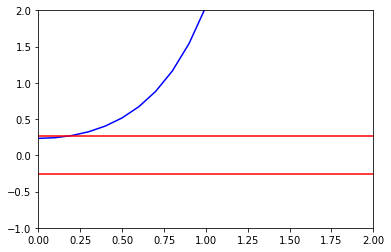

In [9]:
start_pos = 15 / 180 * np.pi
plotting(total_sys, 2, [0., start_pos/56*-3, 0])

### Настроим PID регулятор

In [10]:
total_sys = PID(7, 0, 0) 
shift = total_sys[2][0][1]

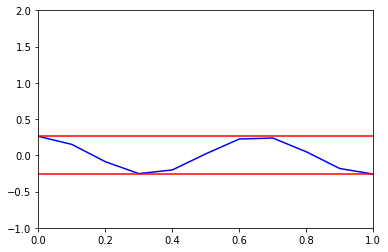

In [11]:
plotting(total_sys, 1, [0., start_pos/shift, 0])

In [12]:
P_res = 7
T = 0.7
P = 0.6 * P_res
I = 1.2 * P_res / T
D = 3 * P_res * T / 40

total_sys = PID(P, I, D)
shift = total_sys[2][0][1]

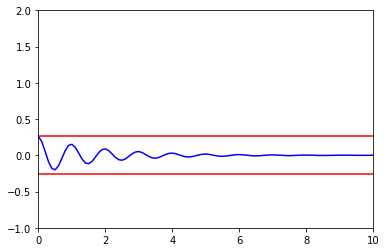

In [13]:
plotting(total_sys, 10, [0, start_pos/shift, 0])